In [1]:
import pandas as pd
import numpy as np
import random 
from sklearn.linear_model import LogisticRegression
import torch 

In [2]:
import data_gen as dg
from scipy import stats
import sns_groups as sns 
import matplotlib.pyplot as plt

### Data Gen & Create Groups

In [3]:
n = 100000
a_tr = 0.4
a_te = 0.9
p = 0.5
rho_train = 0.7
rho_test = 0.1

generate_data = dg.GenerateData(n, a_tr, a_te, p)
Zdiscrete_data = generate_data.get_Zdiscrete_data([rho_train, rho_test])
# Zcontinuos_data = generate_data.get_Zdiscrete_data()
#Zsimple_data = generate_data.get_Zsimple_data([rho_train, rho_test])

train_data, test_data = Zdiscrete_data[0], Zdiscrete_data[1]

#### Performance on predicting y with no model - sigmoid(z+noise) & sigmoid(y+noise) 

In [4]:
train_data['x1-x2'] = (train_data['x1']-train_data['x2']) #z + noise 
train_data['x1+x2'] = (train_data['x1']+train_data['x2']) #y + noise 

train_data['z_prob'] = 1/(1 + np.exp(-train_data['x1-x2']))
train_data['y_prob'] = 1/(1 + np.exp(-train_data['x1+x2']))

In [5]:
train_data

,x1,x2,y,z,x1-x2,x1+x2,z_prob,y_prob
0,-1.716164,0.127955,0.0,0.0,-1.844119,-1.588209,0.136565,0.169636
1,1.700161,-1.293263,0.0,0.0,2.993423,0.406898,0.952276,0.600344
2,-0.022506,0.470188,0.0,0.0,-0.492694,0.447682,0.379259,0.610088
3,-0.444123,-1.172114,0.0,0.0,0.727991,-1.616236,0.674364,0.165725
4,1.355487,1.533997,1.0,1.0,-0.178510,2.889484,0.455491,0.947324
...,...,...,...,...,...,...,...,...
79995,1.150508,0.371230,0.0,0.0,0.779278,1.521738,0.685525,0.820794
79996,2.268893,0.308222,1.0,1.0,1.960671,2.577114,0.876606,0.929374
79997,0.151942,-0.450730,0.0,0.0,0.602671,-0.298788,0.646267,0.425854
79998,-1.633156,-0.689433,0.0,0.0,-0.943723,-2.322589,0.280149,0.089269


In [6]:
sns_groups = sns.SNS_Groups(train_data, test_data)
scores_data = sns_groups.get_train_simple_sns_scores([0.7, p])

In [7]:
scores_data

,y,z,p_z_given_y,p_zy,p_z,p_y_given_z,p_y
0,0.0,0.0,0.7,0.35,0.5,0.7,0.5
1,1.0,0.0,0.3,0.15,0.5,0.3,0.5
2,0.0,1.0,0.3,0.15,0.5,0.3,0.5
3,1.0,1.0,0.7,0.35,0.5,0.7,0.5


In [8]:
grouped_data = sns_groups.generate_train_groups(scores_data)
grouped_data


/scratch/paa9751/mlhc-project/sns_groups.py:112: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  grouped_data['group_idx_gdro'] = pd.factorize(list(zip(grouped_data['y'], grouped_data['z'])))[0]


,x1,x2,y,z,x1-x2,x1+x2,z_prob,y_prob,p_z_given_y,p_zy,p_z,p_y_given_z,p_y,group_idx_sns,group_idx_gdro
0,-1.716164,0.127955,0.0,0.0,-1.844119,-1.588209,0.136565,0.169636,0.7,0.35,0.5,0.7,0.5,0,0
1,1.700161,-1.293263,0.0,0.0,2.993423,0.406898,0.952276,0.600344,0.7,0.35,0.5,0.7,0.5,0,0
2,-0.022506,0.470188,0.0,0.0,-0.492694,0.447682,0.379259,0.610088,0.7,0.35,0.5,0.7,0.5,0,0
3,-0.444123,-1.172114,0.0,0.0,0.727991,-1.616236,0.674364,0.165725,0.7,0.35,0.5,0.7,0.5,0,0
4,1.948437,0.200977,0.0,0.0,1.747460,2.149414,0.851632,0.895614,0.7,0.35,0.5,0.7,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,2.030891,-2.936040,0.0,1.0,4.966932,-0.905149,0.993084,0.287994,0.3,0.15,0.5,0.3,0.5,1,3
79996,1.527599,-1.970097,0.0,1.0,3.497696,-0.442498,0.970622,0.391146,0.3,0.15,0.5,0.3,0.5,1,3
79997,2.932852,-0.362510,0.0,1.0,3.295362,2.570341,0.964269,0.928928,0.3,0.15,0.5,0.3,0.5,1,3
79998,0.870145,-0.770688,0.0,1.0,1.640832,0.099457,0.837648,0.524844,0.3,0.15,0.5,0.3,0.5,1,3


In [9]:
scores_data

,y,z,p_z_given_y,p_zy,p_z,p_y_given_z,p_y
0,0.0,0.0,0.7,0.35,0.5,0.7,0.5
1,1.0,0.0,0.3,0.15,0.5,0.3,0.5
2,0.0,1.0,0.3,0.15,0.5,0.3,0.5
3,1.0,1.0,0.7,0.35,0.5,0.7,0.5


In [10]:
grouped_data.groupby('group_idx_sns')['p_y_given_z'].mean()

group_idx_sns
0    0.7
1    0.3
Name: p_y_given_z, dtype: float64

In [11]:
grouped_data.groupby('group_idx_gdro')[['z', 'y', 'p_y_given_z']].mean()

,z,y,p_y_given_z
group_idx_gdro,,,
0,0.0,0.0,0.7
1,1.0,1.0,0.7
2,0.0,1.0,0.3
3,1.0,0.0,0.3


#### sanity check: checking that noisy z predictions are worse for the minority group and noisy y predicts with around the same accuracy for all groups

In [12]:
grouped_data['z_pred'] = [0 if z_noise<0.5 else 1 for z_noise in grouped_data['z_prob']] 
grouped_data['y_pred'] = [0 if y_noise<0.5 else 1 for y_noise in grouped_data['y_prob']]

In [13]:
group0_data = grouped_data[grouped_data.group_idx_sns==0]
group1_data = grouped_data[grouped_data.group_idx_sns==1]

print("******* Group-Wise Accuracy ******")

z_group0 = sum(group0_data['z_pred'] == group0_data.y)/group0_data.shape[0]
z_group1 = sum(group1_data['z_pred'] == group1_data.y)/group1_data.shape[0]

y_group0 = sum(group0_data['y_pred'] == group0_data.y)/group0_data.shape[0]
y_group1 = sum(group1_data['y_pred'] == group1_data.y)/group1_data.shape[0]

res = pd.DataFrame({'accuracy:y+noise':[y_group0,y_group1], 'accuracy:z+noise':[z_group0, z_group1]}, 
                  index=['group0', 'group1'])
res

******* Group-Wise Accuracy ******


,accuracy:y+noise,accuracy:z+noise
group0,0.709083,0.712502
group1,0.708174,0.287757


In [14]:
group0_data = grouped_data[grouped_data.group_idx_gdro==0]
group1_data = grouped_data[grouped_data.group_idx_gdro==1]
group2_data = grouped_data[grouped_data.group_idx_gdro==2]
group3_data = grouped_data[grouped_data.group_idx_gdro==3]

print("******* Group-Wise Accuracy ******")

z_group0 = sum(group0_data['z_pred'] == group0_data.y)/group0_data.shape[0]
z_group1 = sum(group1_data['z_pred'] == group1_data.y)/group1_data.shape[0]
z_group2 = sum(group2_data['z_pred'] == group2_data.y)/group2_data.shape[0]
z_group3 = sum(group3_data['z_pred'] == group3_data.y)/group3_data.shape[0]

y_group0 = sum(group0_data['y_pred'] == group0_data.y)/group0_data.shape[0]
y_group1 = sum(group1_data['y_pred'] == group1_data.y)/group1_data.shape[0]
y_group2 = sum(group2_data['y_pred'] == group2_data.y)/group2_data.shape[0]
y_group3 = sum(group3_data['y_pred'] == group3_data.y)/group3_data.shape[0]

res = pd.DataFrame({'accuracy:y+noise':[y_group0,y_group1, y_group2, y_group3], 'accuracy:z+noise':[z_group0, z_group1, z_group2, z_group3]}, 
                  index=['group0', 'group1', 'group2', 'group3'])
res

******* Group-Wise Accuracy ******


,accuracy:y+noise,accuracy:z+noise
group0,0.497898,0.502601
group1,0.920111,0.922247
group2,0.917151,0.497935
group3,0.501169,0.079563


In [15]:
z_group0_nonoise = sum(group0_data['z'] == group0_data.y)/group0_data.shape[0]
z_group1_nonoise = sum(group1_data['z'] == group1_data.y)/group1_data.shape[0]

print('accuracy of z directly:')
print('group0', z_group0_nonoise)
print('group1', z_group1_nonoise)

accuracy of z directly:
group0 1.0
group1 1.0


### Logistic Regression with Group DRO 

In [16]:
torch.cuda.is_available()

True

In [17]:
torch.manual_seed(42)

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim

class LogReg(nn.Module):
    def __init__(self, input_dim):
        super(LogReg, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out

In [19]:
#helper functions: 
def compute_group_avg(losses, group_idx):
    # compute observed counts and mean loss for each group
    n_groups = torch.unique(group_idx).shape[0]
    group_map = (group_idx == torch.arange(n_groups).unsqueeze(1).long()).float()
    group_count = group_map.sum(1)
    group_denom = group_count + (group_count==0).float() # avoid nans
    group_loss = (group_map @ losses.view(-1))/group_denom #check loss dim 
    return group_loss, group_count

def compute_robust_loss(group_probs, step_size, group_loss): 
    #they either normalise group loss or adjust group loss by adding adj/sqrt(count)
    group_probs = group_probs * torch.exp(step_size * group_loss)
    group_probs = group_probs/group_probs.sum()
    robust_loss = group_loss @ group_probs
    return [robust_loss, group_probs.detach()]

In [20]:
def train_model_groups(experiment_type, num_epochs, model, data): 
    X = torch.tensor(data[['x1','x2']].values)
    y = torch.tensor(data['y'].values)
    if experiment_type == 'sns-groupDRO':
        g = torch.tensor(grouped_data['group_idx_sns'].values)
    elif experiment_type=='groupDRO':
        g = torch.tensor(grouped_data['group_idx_gdro'].values)
    
    n_groups = torch.unique(g).shape[0] 
    input_dim = 2
    criterion = nn.BCELoss(reduction='none')  
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    
    robust_train_loss=[]
    actual_train_loss = []

    group_0_loss = []
    group_1_loss = []
    group_2_loss = []
    group_3_loss = []

    group_probs = torch.ones(n_groups) / n_groups
    step_size = 1
    
    for epoch in range(num_epochs): #im using full gradient descent 
        model.train()
        optimizer.zero_grad()
        yhat = model(X.float())
        group_idx = g
        y_gt = y.unsqueeze(1)
        loss = criterion(yhat, y_gt.float())

        group_loss, group_count = compute_group_avg(loss, group_idx)

        robust_info = compute_robust_loss(group_probs, step_size, group_loss)
        robust_loss = robust_info[0]
        group_probs = robust_info[1]

        group_0_loss.append(group_loss[0].item())
        group_1_loss.append(group_loss[1].item())

        if n_groups>2:
            group_2_loss.append(group_loss[2].item())
            group_3_loss.append(group_loss[3].item()) #this is the minority group by sns score 

        if epoch%100==0: 
            print('group_loss:', group_loss)
            print('group_count:', group_count)
            print('robust_loss:', robust_loss.item())
            print('actual loss:', loss.mean().item())
            print('group probs:', group_probs)
            print('*******************************')
        robust_train_loss.append(robust_loss.item())
        actual_train_loss.append(loss.mean().item())

        #train network with robust loss 
        robust_loss.backward()

        optimizer.step()

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Robust Loss: {robust_loss.item():.4f}, Actual Loss: {loss.mean():.4f}')
    if n_groups==2: 
        group_losses_list = [group_0_loss, group_1_loss]
    elif n_groups>2:
        group_losses_list = [group_0_loss, group_1_loss, group_2_loss, group_2_loss]

    return actual_train_loss, robust_train_loss, group_losses_list 

In [21]:
def train_model_erm(num_epochs, model, data): 
    X = torch.tensor(data[['x1','x2']].values)
    y = torch.tensor(data['y'].values)
    input_dim = 2
    criterion = nn.BCELoss(reduction='mean')  
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    
    train_loss = []
    
    for epoch in range(num_epochs): #im using full gradient descent 
        model.train()
        optimizer.zero_grad()
        yhat = model(X.float())
        y_gt = y.unsqueeze(1)
        loss = criterion(yhat, y_gt.float())
        
        train_loss.append(loss.item())

        #train network with robust loss 
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
            
    return train_loss

In [22]:
input_dim=2
n_epochs = 10000
model_gdro = LogReg(input_dim)
model_sns = LogReg(input_dim)
model_erm = LogReg(input_dim)

print("TRAINING GROUP DRO")
print("\n")
actual_train_loss, robust_train_loss, group_losses_list = train_model_groups('groupDRO', n_epochs, model_gdro, grouped_data)
print("\n")
print("TRAINING SNS GROUP DRO")
print("\n")
sns_actual_train_loss, sns_robust_train_loss, sns_group_losses_list = train_model_groups('sns-groupDRO', n_epochs, model_sns, grouped_data)
print("TRAINING ERM")
print("\n")
erm_train_loss = train_model_erm(n_epochs, model_erm, grouped_data)

TRAINING GROUP DRO


group_loss: tensor([0.6873, 0.3990, 0.3857, 0.6647], grad_fn=<DivBackward0>)
group_count: tensor([28068., 28089., 11865., 11978.])
robust_loss: 0.5542194247245789
actual loss: 0.53792804479599
group probs: tensor([0.2885, 0.2162, 0.2133, 0.2820])
*******************************
Epoch [100/10000], Robust Loss: 0.4983, Actual Loss: 0.5526
group_loss: tensor([0.4969, 0.6413, 0.5828, 0.4474], grad_fn=<DivBackward0>)
group_count: tensor([28068., 28089., 11865., 11978.])
robust_loss: 0.4967550039291382
actual loss: 0.5529158115386963
group probs: tensor([9.9216e-01, 1.4142e-03, 1.4185e-05, 6.4107e-03])
*******************************
Epoch [200/10000], Robust Loss: 0.5074, Actual Loss: 0.5070
group_loss: tensor([0.5462, 0.4035, 0.5004, 0.6641], grad_fn=<DivBackward0>)
group_count: tensor([28068., 28089., 11865., 11978.])
robust_loss: 0.5118896961212158
actual loss: 0.5069645643234253
group probs: tensor([0.6892, 0.2666, 0.0091, 0.0351])
*******************************
Ep

### (not sure how informative these are) loss curves across all data + group-wise

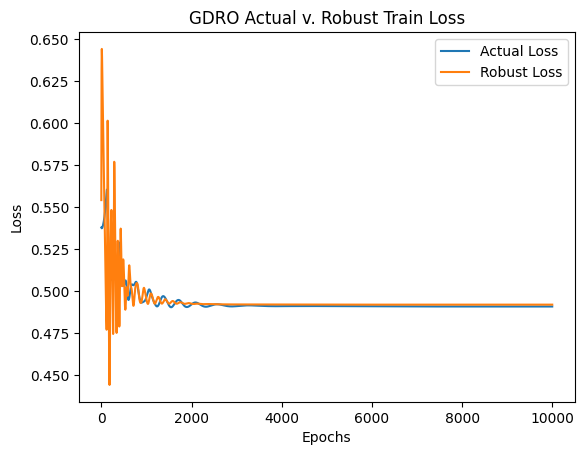

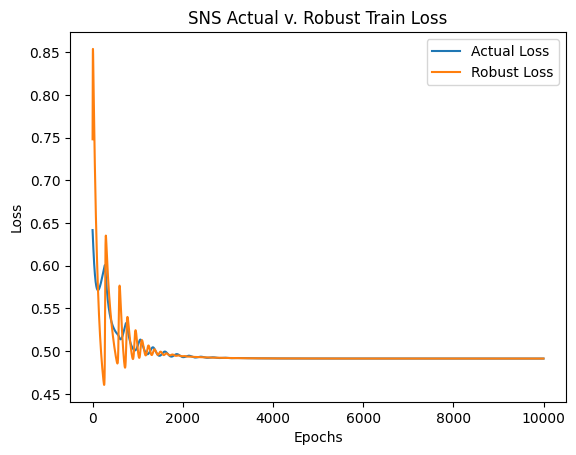

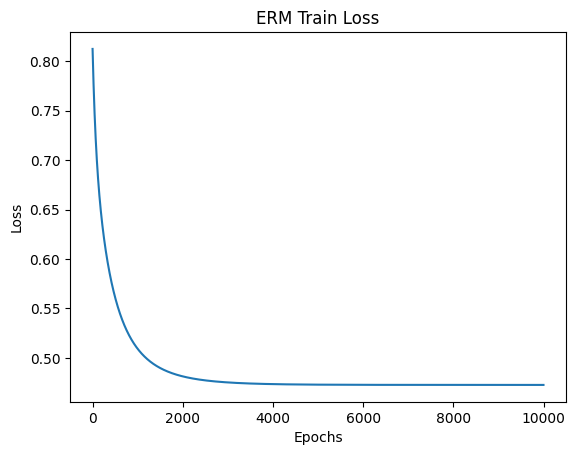

In [23]:
plt.title('GDRO Actual v. Robust Train Loss')
plt.plot(actual_train_loss, label = 'Actual Loss')
plt.plot(robust_train_loss, label = 'Robust Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

plt.title('SNS Actual v. Robust Train Loss')
plt.plot(sns_actual_train_loss, label = 'Actual Loss')
plt.plot(sns_robust_train_loss, label = 'Robust Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

plt.title('ERM Train Loss')
plt.plot(erm_train_loss)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()


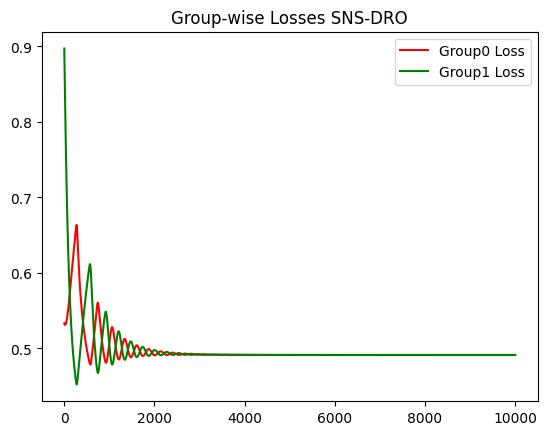

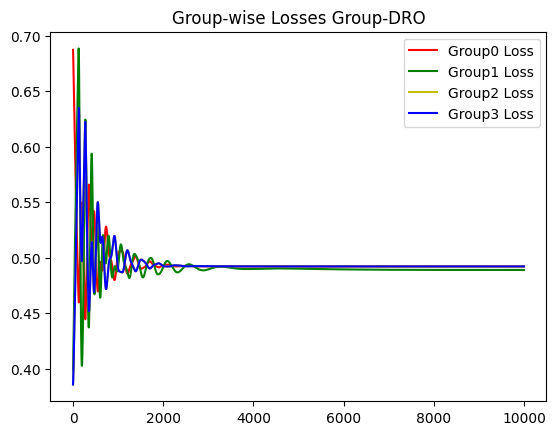

In [24]:
plt.title('Group-wise Losses SNS-DRO')
plt.plot(sns_group_losses_list[0], label = 'Group0 Loss', color='r')
plt.plot(sns_group_losses_list[1], label = 'Group1 Loss', color='g')
plt.legend()
plt.show()

plt.title('Group-wise Losses Group-DRO')
plt.plot(group_losses_list[0], label = 'Group0 Loss', color='r')
plt.plot(group_losses_list[1], label = 'Group1 Loss', color='g')
plt.plot(group_losses_list[2], label = 'Group2 Loss', color='y')
plt.plot(group_losses_list[3], label = 'Group3 Loss', color='b')
plt.legend()
plt.show()

In [25]:
grouped_data.head()

,x1,x2,y,z,x1-x2,x1+x2,z_prob,y_prob,p_z_given_y,p_zy,p_z,p_y_given_z,p_y,group_idx_sns,group_idx_gdro,z_pred,y_pred
0,-1.716164,0.127955,0.0,0.0,-1.844119,-1.588209,0.136565,0.169636,0.7,0.35,0.5,0.7,0.5,0,0,0,0
1,1.700161,-1.293263,0.0,0.0,2.993423,0.406898,0.952276,0.600344,0.7,0.35,0.5,0.7,0.5,0,0,1,1
2,-0.022506,0.470188,0.0,0.0,-0.492694,0.447682,0.379259,0.610088,0.7,0.35,0.5,0.7,0.5,0,0,0,1
3,-0.444123,-1.172114,0.0,0.0,0.727991,-1.616236,0.674364,0.165725,0.7,0.35,0.5,0.7,0.5,0,0,1,0
4,1.948437,0.200977,0.0,0.0,1.747460,2.149414,0.851632,0.895614,0.7,0.35,0.5,0.7,0.5,0,0,1,1


In [26]:
from torchmetrics import AUROC 

In [27]:
def get_accuracy(data, model):
    yhat = model(torch.tensor(data[['x1','x2']].values, dtype=float).float()).detach().numpy()
    ypred = [0 if y<0.5 else 1 for y in yhat]
    accuracy = sum(data.y == ypred)/len(data)
    return accuracy 

def get_auroc(data, model):
    auroc = AUROC(task="binary")
    yhat = model(torch.tensor(data[['x1','x2']].values, dtype=float).float()).detach()#.numpy()
    target = torch.tensor(data.y.values)
    #print(yhat)
    auroc_value = auroc(yhat, target)
    print(auroc_value)
    return auroc_value.item() 

def get_group_accuracy(grouped_data, experiment_type, metric_func):
    if experiment_type=='sns_groupdro':
        res_gdro=grouped_data.groupby('group_idx_gdro').apply(metric_func,model_sns)
        res_sns=grouped_data.groupby('group_idx_sns').apply(metric_func,model_sns)
    elif experiment_type=='groupdro':
        res_gdro=grouped_data.groupby('group_idx_gdro').apply(metric_func,model_gdro)
        res_sns = grouped_data.groupby('group_idx_sns').apply(metric_func,model_gdro)
    elif experiment_type == 'erm': 
        res_gdro = grouped_data.groupby('group_idx_gdro').apply(metric_func,model_erm)
        res_sns = grouped_data.groupby('group_idx_sns').apply(metric_func,model_erm)
    
    res = {'gdro_groups': res_gdro, 'sns_groups':res_sns}
    
    return res 

In [28]:
train_sns_res = pd.DataFrame(get_group_accuracy(grouped_data, 'sns_groupdro', get_accuracy))#report both 
train_gdro_res = pd.DataFrame(get_group_accuracy(grouped_data, 'groupdro', get_accuracy)) #report both 
train_erm_res = pd.DataFrame(get_group_accuracy(grouped_data, 'erm', get_accuracy))
train_res_group_a = pd.DataFrame({'GDRO': train_gdro_res['gdro_groups'], 'SNS': train_sns_res['gdro_groups'], 'ERM': train_erm_res['gdro_groups']})
train_res_group_b = pd.DataFrame({'GDRO': train_gdro_res['sns_groups'], 'SNS': train_sns_res['sns_groups'], 'ERM': train_erm_res['sns_groups']})

In [29]:
group_a = grouped_data.groupby('group_idx_gdro')[['z', 'y', 'p_y_given_z']].mean()
group_b = grouped_data.groupby('group_idx_sns')[['p_y_given_z']].mean()
train_res_group_a.index.name = 'group_idx_gdro'
train_res_group_b.index.name = 'group_idx_sns'
train_res_group_b = train_res_group_b.iloc[:2]

In [51]:
pd.merge(group_a, train_res_group_a, left_index=True, right_index=True)#.to_csv('train_gdro.csv')

,z,y,p_y_given_z,GDRO,SNS,ERM
group_idx_gdro,,,,,,
0,0.0,0.0,0.7,0.758123,0.760332,0.808893
1,1.0,1.0,0.7,0.763003,0.760333,0.809676
2,0.0,1.0,0.3,0.758955,0.757438,0.682849
3,1.0,0.0,0.3,0.758056,0.761062,0.690683


In [52]:
pd.merge(group_b, train_res_group_b, left_index=True, right_index=True)#.to_csv('train_sns.csv')

,p_y_given_z,GDRO,SNS,ERM
group_idx_sns,,,,
0,0.7,0.760564,0.760333,0.809285
1,0.3,0.758504,0.759258,0.686784


### test time - 

In [32]:
test_data

,x1,x2,y,z
0,1.437967,2.279108,1.0,0.0
1,2.258771,-1.544870,0.0,1.0
2,0.722971,-0.260558,1.0,0.0
3,1.273011,0.187244,1.0,0.0
4,0.882779,2.186946,1.0,0.0
...,...,...,...,...
19995,0.045920,-2.719868,0.0,1.0
19996,0.097928,3.123920,1.0,0.0
19997,0.497012,1.721068,1.0,0.0
19998,0.343924,1.168391,1.0,0.0


In [33]:
scores_data #these are groups on train

,y,z,p_z_given_y,p_zy,p_z,p_y_given_z,p_y
0,0.0,0.0,0.7,0.35,0.5,0.7,0.5
1,1.0,0.0,0.3,0.15,0.5,0.3,0.5
2,0.0,1.0,0.3,0.15,0.5,0.3,0.5
3,1.0,1.0,0.7,0.35,0.5,0.7,0.5


In [34]:
test_grouped_data = test_data.merge(scores_data[['y', 'z', 'p_y_given_z']], 
                                    on =['y', 'z'], how='left').drop_duplicates()
test_grouped_data

,x1,x2,y,z,p_y_given_z
0,1.437967,2.279108,1.0,0.0,0.3
1,2.258771,-1.544870,0.0,1.0,0.3
2,0.722971,-0.260558,1.0,0.0,0.3
3,1.273011,0.187244,1.0,0.0,0.3
4,0.882779,2.186946,1.0,0.0,0.3
...,...,...,...,...,...
19995,0.045920,-2.719868,0.0,1.0,0.3
19996,0.097928,3.123920,1.0,0.0,0.3
19997,0.497012,1.721068,1.0,0.0,0.3
19998,0.343924,1.168391,1.0,0.0,0.3


In [35]:
test_grouped_data['group_idx_sns']=pd.factorize(test_grouped_data['p_y_given_z'])[0]
test_grouped_data['group_idx_gdro'] = pd.factorize(list(zip(test_grouped_data['y'], test_grouped_data['z'])))[0]

test_grouped_data

/state/partition1/job-40522647/ipykernel_1647474/1020360847.py:2: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  test_grouped_data['group_idx_gdro'] = pd.factorize(list(zip(test_grouped_data['y'], test_grouped_data['z'])))[0]


,x1,x2,y,z,p_y_given_z,group_idx_sns,group_idx_gdro
0,1.437967,2.279108,1.0,0.0,0.3,0,0
1,2.258771,-1.544870,0.0,1.0,0.3,0,1
2,0.722971,-0.260558,1.0,0.0,0.3,0,0
3,1.273011,0.187244,1.0,0.0,0.3,0,0
4,0.882779,2.186946,1.0,0.0,0.3,0,0
...,...,...,...,...,...,...,...
19995,0.045920,-2.719868,0.0,1.0,0.3,0,1
19996,0.097928,3.123920,1.0,0.0,0.3,0,0
19997,0.497012,1.721068,1.0,0.0,0.3,0,0
19998,0.343924,1.168391,1.0,0.0,0.3,0,0


In [37]:
test_grouped_data.group_idx_gdro.value_counts()

group_idx_gdro
0    9063
1    8961
3     992
2     984
Name: count, dtype: int64

In [38]:
test_sns_res = pd.DataFrame(get_group_accuracy(test_grouped_data, 'sns_groupdro', get_accuracy))#report both 
test_gdro_res = pd.DataFrame(get_group_accuracy(test_grouped_data, 'groupdro', get_accuracy)) #report both 
test_erm_res = pd.DataFrame(get_group_accuracy(test_grouped_data, 'erm', get_accuracy))
test_res_group_a = pd.DataFrame({'GDRO': test_gdro_res['gdro_groups'], 'SNS': test_sns_res['gdro_groups'], 'ERM': test_erm_res['gdro_groups']})
test_res_group_b = pd.DataFrame({'GDRO': test_gdro_res['sns_groups'], 'SNS': test_sns_res['sns_groups'], 'ERM': test_erm_res['sns_groups']})

In [39]:
test_gdro_res

,gdro_groups,sns_groups
0,0.766634,0.764592
1,0.762527,0.769737
2,0.767276,NaN
3,0.772177,NaN


In [40]:
group_a = grouped_data.groupby('group_idx_gdro')[['z', 'y', 'p_y_given_z']].mean()
group_b = grouped_data.groupby('group_idx_sns')[['p_y_given_z']].mean()
test_res_group_a.index.name = 'group_idx_gdro'
test_res_group_b.index.name = 'group_idx_sns'
test_res_group_b = test_res_group_b.iloc[:2]

In [47]:
gdro_test = pd.merge(group_a, test_res_group_a, left_index=True, right_index=True)
gdro_test

,z,y,p_y_given_z,GDRO,SNS,ERM
group_idx_gdro,,,,,,
0,0.0,0.0,0.7,0.766634,0.764868,0.694472
1,1.0,1.0,0.7,0.762527,0.765205,0.689990
2,0.0,1.0,0.3,0.767276,0.765244,0.805894
3,1.0,0.0,0.3,0.772177,0.774194,0.812500


In [48]:
sns_test =pd.merge(group_b, test_res_group_b, left_index=True, right_index=True)
sns_test

,p_y_given_z,GDRO,SNS,ERM
group_idx_sns,,,,
0,0.7,0.764592,0.765036,0.692244
1,0.3,0.769737,0.769737,0.809211


In [46]:
test_grouped_data.groupby('group_idx_gdro')[['z', 'y']].mean()

,z,y
group_idx_gdro,,
0,0.0,0.0
1,1.0,1.0
2,1.0,0.0
3,0.0,1.0


z - image border (14 px) 
1. P(y|z) - sns groups (equally spaced - plot distr) 
2. z - hospital (train with z - hospital gdro) 
save all predictions after every epoch for sns + gdro 